In [1]:
import numpy as np

In [2]:
from network import Network

In [3]:
data = np.loadtxt("spambase.data", delimiter=",")
print(len(data))
print(data.shape)
data

4601
(4601, 58)


array([[0.000e+00, 6.400e-01, 6.400e-01, ..., 6.100e+01, 2.780e+02,
        1.000e+00],
       [2.100e-01, 2.800e-01, 5.000e-01, ..., 1.010e+02, 1.028e+03,
        1.000e+00],
       [6.000e-02, 0.000e+00, 7.100e-01, ..., 4.850e+02, 2.259e+03,
        1.000e+00],
       ...,
       [3.000e-01, 0.000e+00, 3.000e-01, ..., 6.000e+00, 1.180e+02,
        0.000e+00],
       [9.600e-01, 0.000e+00, 0.000e+00, ..., 5.000e+00, 7.800e+01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 6.500e-01, ..., 5.000e+00, 4.000e+01,
        0.000e+00]])

In [4]:
div = len(data) // 5
num_train = 4 * div
print("Num test should be", div)
#train_inds = np.random.randint(len(data), size=num_train)
train_inds = np.random.choice(range(len(data)), size=num_train, replace=False)
print("train inds:", train_inds, train_inds.shape)
test_inds = np.setxor1d(np.array(range(len(data))), train_inds)
#test_inds = np.array([i for i in range(len(data)) if i not in train_inds])
print("test inds:", test_inds, test_inds.shape)
train_data = data[train_inds, :]
test_data = data[test_inds, :]
np.random.shuffle(test_data)
print("Training Data:", train_data, train_data.shape)
print("Testing Data:", test_data, test_data.shape)

Num test should be 920
train inds: [4302 3212  872 ... 2421 1416 4454] (3680,)
test inds: [   0    8    9   11   12   13   15   23   28   29   37   38   47   51
   58   60   61   69   79   81   83   88   93  100  109  110  116  120
  121  123  125  127  130  132  138  152  155  156  157  167  169  172
  173  178  179  183  184  186  189  190  195  212  213  228  234  243
  266  267  271  278  283  288  289  291  293  297  298  303  317  331
  333  343  345  346  347  349  358  367  368  370  376  377  385  388
  391  395  407  428  429  430  433  437  442  444  448  459  464  474
  480  481  482  484  486  488  501  503  505  508  519  525  530  535
  543  548  560  590  591  596  597  599  603  604  610  612  614  616
  626  634  641  646  651  658  659  662  668  671  672  673  679  687
  689  692  701  703  704  709  711  712  721  724  734  735  747  753
  755  757  769  770  775  777  781  788  789  792  795  805  811  818
  821  829  835  836  839  842  859  862  870  876  880  8

In [5]:
train_labels = train_data[:, -1]
train_data = train_data[:, :-1]
test_labels = test_data[:, -1]
test_data = test_data[:, :-1]
print("Train Labels:", train_labels, train_labels.shape)
print("Train Data:", train_data, train_data.shape)
print("Test Labels:", test_labels, test_labels.shape)
print("Test Data:", test_data, test_data.shape)

Train Labels: [0. 0. 1. ... 0. 1. 0.] (3680,)
Train Data: [[0.0000e+00 8.2000e-01 0.0000e+00 ... 7.4160e+00 4.3000e+01 3.5600e+02]
 [5.0000e-02 0.0000e+00 1.1000e-01 ... 2.7870e+00 4.7000e+01 1.0900e+03]
 [4.5000e-01 0.0000e+00 6.7000e-01 ... 4.9470e+00 1.0200e+02 5.6400e+02]
 ...
 [3.1000e-01 3.1000e-01 9.4000e-01 ... 2.3680e+00 4.5000e+01 1.8000e+02]
 [0.0000e+00 1.7000e-01 0.0000e+00 ... 4.2590e+00 8.5000e+01 3.3180e+03]
 [0.0000e+00 0.0000e+00 1.0600e+00 ... 1.3333e+01 7.3000e+01 1.6000e+02]] (3680, 57)
Test Labels: [1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.

In [6]:
def get_metrics(output, expected):
    tn = 0
    tp = 0
    fn = 0
    fp = 0
    for o, e in zip(output, expected):
        if o == e and o == 0:
            tn += 1
        elif o == e and o == 1:
            tp += 1
        elif o != e and o == 0:
            fn += 1
        else:
            fp += 1
    print(tn, tp, fn, fp)
    accuracy = (tn + tp) / (tn + tp + fn + fp)
    if tp + fn != 0:
        tpr = tp / (tp + fn)
    else:
        tpr = 0
        print("TPR could not be calculated.")
    if tp + fp != 0:
        ppv = tp / (tp + fp)
    else:
        ppv = 0
        print("PPV could not be calculated")
    if tn + fp != 0:
        tnr = tn / (tn + fp)
    else:
        print("TNR could not be calculated")
    if ppv + tpr != 0:
        f_1 = (2 * ppv * tpr) / (ppv + tpr)
    else:
        f_1 = 0
        print("F1 Score could not be calculated")
    print("Accuracy:", accuracy)
    print("True Positive Rate:", tpr)
    print("Positive Predictive Value (Precision):", ppv)
    print("True Negative Rate:", tnr)
    print("F1 Score:", f_1)

In [7]:
"""for act in ["softmax", "linear", "sigmoid"]:
    print(act)
    print("--------\n")
    for it in range(30, 61, 30):
        print("Num Iterations =", it)
        for thresh in np.arange(0.2, 0.3, 0.05):
            print("Error Threshold =", thresh)
            for delta in np.arange(0.001, 0.01, 0.005):
                print("Error delta =", delta)
                for lr in np.arange(0.001, 0.01, 0.005):
                    print("Learning Rate =", lr)
                    for nhpl in range(20, 60, 20):
                        print("Number of Hidden Nodes per layer =", nhpl)
                        print()
                        nnet = Network(len(train_data[0]), 1, nhpl, 2, lr, act, it, thresh, delta)
                        nnet.train(train_data, train_labels)
                        output = nnet.estimate(test_data)
                        get_metrics(output, test_labels)
                        print()"""

'for act in ["softmax", "linear", "sigmoid"]:\n    print(act)\n    print("--------\n")\n    for it in range(30, 61, 30):\n        print("Num Iterations =", it)\n        for thresh in np.arange(0.2, 0.3, 0.05):\n            print("Error Threshold =", thresh)\n            for delta in np.arange(0.001, 0.01, 0.005):\n                print("Error delta =", delta)\n                for lr in np.arange(0.001, 0.01, 0.005):\n                    print("Learning Rate =", lr)\n                    for nhpl in range(20, 60, 20):\n                        print("Number of Hidden Nodes per layer =", nhpl)\n                        print()\n                        nnet = Network(len(train_data[0]), 1, nhpl, 2, lr, act, it, thresh, delta)\n                        nnet.train(train_data, train_labels)\n                        output = nnet.estimate(test_data)\n                        get_metrics(output, test_labels)\n                        print()'

In [8]:
from PCA import *

In [9]:
norm_data = normalize(data)
S, V = decomp(norm_data)

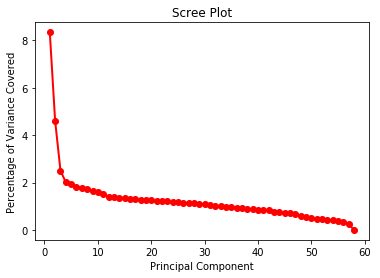

In [10]:
graph_scree(S)

In [11]:
pcs = get_pc(V, 5)
pca_data = reduce_data(data, pcs)
pca_data

array([[ -17.47770111,   69.35200907,  135.05743232,  -35.07923995,
         -22.84604232],
       [ -58.45943292,  225.62546653,  441.8147653 , -113.25882877,
         -67.16022809],
       [-137.30507949,  549.69726657, 1093.75567067, -283.53430034,
        -182.3933178 ],
       ...,
       [  -6.58771436,   25.13529107,   48.24907091,  -11.78240406,
          -7.37582566],
       [  -4.54504484,   17.01227793,   32.03119897,   -7.99490293,
          -4.88878579],
       [  -2.82154499,    9.90607075,   16.82340964,   -3.49032197,
          -2.22601868]])

In [12]:
div = len(data) // 5
num_train = 4 * div
print("Num test should be", div)
#train_inds = np.random.randint(len(data), size=num_train)
train_inds = np.random.choice(range(len(data)), size=num_train, replace=False)
print("train inds:", train_inds, train_inds.shape)
test_inds = np.setxor1d(np.array(range(len(data))), train_inds)
#test_inds = np.array([i for i in range(len(data)) if i not in train_inds])
print("test inds:", test_inds, test_inds.shape)
pca_train_data = pca_data[train_inds, :]
pca_test_data = pca_data[test_inds, :]
np.random.shuffle(test_data)
print("Training Data:", pca_train_data, pca_train_data.shape)
print("Testing Data:", pca_test_data, pca_test_data.shape)

Num test should be 920
train inds: [2226  855  503 ... 3847 2288 2622] (3680,)
test inds: [   9   11   18   35   36   37   38   44   54   60   62   69   70   79
   82   84   85   92   97  108  111  117  119  120  125  128  129  138
  139  144  147  160  166  170  175  182  183  186  190  195  197  201
  203  207  210  214  225  235  240  245  247  248  251  265  269  271
  273  274  275  276  278  279  281  286  299  301  306  308  331  334
  339  344  345  354  358  359  363  374  375  388  395  397  398  400
  415  424  425  426  429  432  444  449  450  458  462  463  467  468
  482  495  497  499  508  512  518  533  534  535  552  556  558  559
  560  562  565  566  569  575  577  583  585  592  593  600  605  608
  619  626  629  635  637  643  644  653  658  659  662  665  668  673
  682  687  694  704  722  727  731  733  748  753  754  755  758  762
  767  770  774  780  782  794  796  799  800  802  814  821  823  828
  834  837  839  841  844  847  849  851  853  857  869  8

In [13]:
pca_train_labels = pca_train_data[:, -1]
pca_train_data = pca_train_data[:, :-1]
pca_test_labels = pca_test_data[:, -1]
pca_test_data = pca_test_data[:, :-1]

In [14]:
nnet = Network(len(pca_train_data[0]), 1, 40, 2, 0.001, "sigmoid", 30, 0.2, 0.006)
nnet.train(pca_train_data, pca_train_labels)
output = nnet.estimate(pca_test_data)
get_metrics(output, pca_test_labels)

Epoch 1: Error = 1.282429
Epoch 2: Error = 1.711782
Epoch 3: Error = 1.807605
Epoch 4: Error = 1.851964
Epoch 5: Error = 1.878625
Epoch 6: Error = 1.896777
Epoch 7: Error = 1.910072
Epoch 8: Error = 1.920289
Epoch 9: Error = 1.928413
Epoch 10: Error = 1.935040
Epoch 11: Error = 1.940556
  Threshold for change in error met. Ending training.
0 0 415 506
F1 Score could not be calculated
Accuracy: 0.0
True Positive Rate: 0.0
Positive Predictive Value (Precision): 0.0
True Negative Rate: 0.0
F1 Score: 0
